# Dichotomie

On cherche la racine d'une fonction $f$ continue sur $[a,b]$ telle que $f(a)f(b)\leq 0$


In [2]:
def dichotomie(f,a,b,e):
    while b-a>e:
        c = (a+b)/2
        if f(a)*f(c) <= 0 :
            b=c

        else :
            a=c
    return c

In [3]:
import numpy as np

dichotomie(np.sin,3,4,10e-6) # almost_equal(pi)


3.1415939331054688

Même méthode mais avec une boucle for pour borner le nombre d'itérations.

Mais combien d'itérations maximum ?
On remarque qu'à chaque itération, la longueur de l'intervalle est divisée par 2. A partir d'un certain moment, la division de l'intervalle sera limité par le calcul flottant.

Regardons ce qu'il se passe avec l'intervalle de départ $[-1,1]$ :

In [4]:
a,b = -1,1
i = 0
while (a+b)/2 != a and (a+b)/2 != b:
    if i%2 == 0 :
        a = (a+b)/2
    else:
        b = (a+b)/2
    i+=1
    print(f"{i} ème opération:   [{a}, {b}], {b-a=}")
f'{(a,b)=}, {i=}, {b-a=}'


1 ème opération:   [0.0, 1], b-a=1.0
2 ème opération:   [0.0, 0.5], b-a=0.5
3 ème opération:   [0.25, 0.5], b-a=0.25
4 ème opération:   [0.25, 0.375], b-a=0.125
5 ème opération:   [0.3125, 0.375], b-a=0.0625
6 ème opération:   [0.3125, 0.34375], b-a=0.03125
7 ème opération:   [0.328125, 0.34375], b-a=0.015625
8 ème opération:   [0.328125, 0.3359375], b-a=0.0078125
9 ème opération:   [0.33203125, 0.3359375], b-a=0.00390625
10 ème opération:   [0.33203125, 0.333984375], b-a=0.001953125
11 ème opération:   [0.3330078125, 0.333984375], b-a=0.0009765625
12 ème opération:   [0.3330078125, 0.33349609375], b-a=0.00048828125
13 ème opération:   [0.333251953125, 0.33349609375], b-a=0.000244140625
14 ème opération:   [0.333251953125, 0.3333740234375], b-a=0.0001220703125
15 ème opération:   [0.33331298828125, 0.3333740234375], b-a=6.103515625e-05
16 ème opération:   [0.33331298828125, 0.333343505859375], b-a=3.0517578125e-05
17 ème opération:   [0.3333282470703125, 0.333343505859375], b-a=1.52587

'(a,b)=(0.3333333333333333, 0.33333333333333337), i=55, b-a=5.551115123125783e-17'

Ici, effectuer une 56ème itération ne réduirait pas plus l'intervalle. Cependant, avec un intervalle de départ plus grand, on aurait pu faire plus d'itérations.
Comment calculer ce nombre d'itérations max en fonction de l'intervalle de départ ?

On a la formule : 

$$\lceil \log_2(\frac{b-a}{eps}) \rceil$$

In [5]:
eps = np.finfo(float).eps
np.ceil(np.log2((1 - -1)/eps))

# Pourquoi j'ai 53 avec ce calcul alors que précédemment j'ai pu effectuer 55 itérations de division? 

53.0

In [6]:
from math import ceil
from typing import List
eps = np.finfo(float).eps

# Cette fois-ci on s'arrête lorsque f(c) est suffisamment proche de 0, ou lorsque l'on dépasse le nombre d'itérations maximum


def dichotomie_bornee(f, a, b, e, sols: List[float] = None):
    """sols: une liste à fournir qui contiendra la liste des 'c' générés à la fin de l'algo"""

    for _ in range(ceil(np.log2((b-a)/eps))):
        c = (a+b)/2
        if sols is not None:
            sols.append(c)
        if abs(f(c)) <= e:
            return c

        if f(a)*f(c) <= 0:
            b = c
        else:
            a = c
    return c


# Application de la dichotomie : 
Utilisons cet algo pour trouver le minimum global de $x\mapsto x^4 - (x-1)^2 +1$

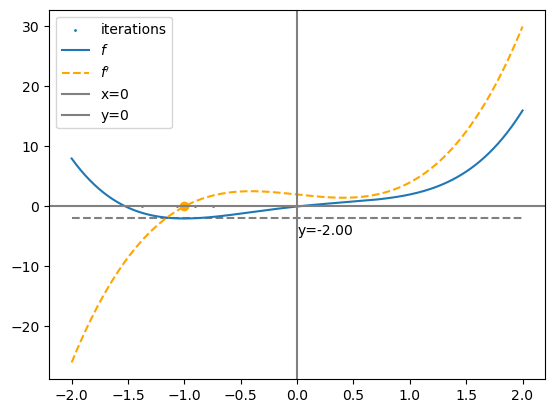

In [7]:
import matplotlib.pyplot as plt

def f(x):
    return x**4 - (x-1)**2 +1

def df(x):
    return 4*x**3 -2*x + 2

a,b=(-2,2)
x = np.linspace(a,b,500)
y = f(x)
dy= df(x)

sols = []
dr1 = dichotomie_bornee(df, -2, 0.5, 0.001,sols)
ymin=f(dr1)

plt.scatter(sols,[0]*len(sols) ,s=1, label="iterations")

plt.scatter([dr1], [df(dr1)],color="orange")

plt.hlines(ymin,a,b, color="grey", linestyle="--")
plt.text(0, -4, f'y={ymin:.2f}', ha='left', va='center')

plt.plot(x,y,label="$f$")
plt.plot(x,dy, linestyle="--",color="orange", label="$f'$")

plt.axvline(x=0, c="grey", label="x=0")
plt.axhline(y=0, c="grey", label="y=0")

plt.legend()

plt.show()




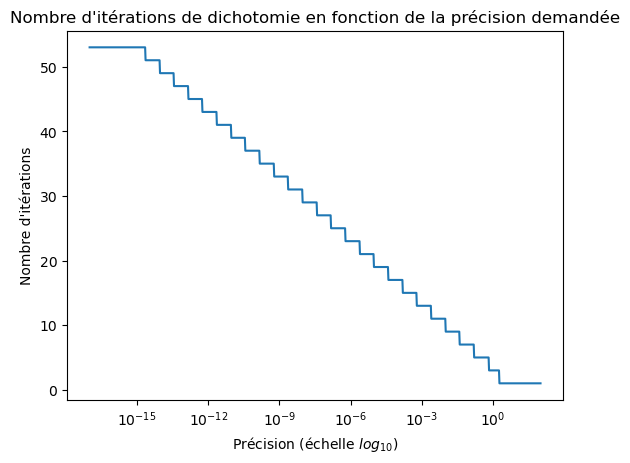

In [8]:
# Nombre d'itérations en fonction de la précision
precisions = np.logspace(-17, 2, num=1000, base=10)
y = []
for k in precisions:
    sols = []
    dichotomie_bornee(df, -2, 0.5, k, sols)
    y.append(len(sols))

plt.title("Nombre d'itérations de dichotomie en fonction de la précision demandée")
plt.xlabel("Précision (échelle $log_{10}$)")
plt.ylabel("Nombre d'itérations")
plt.plot(precisions, y)
plt.xscale('log')
plt.show()


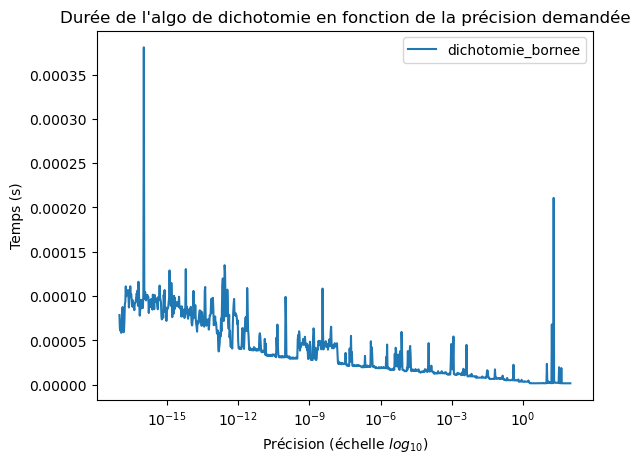

In [9]:
# Temps d'exécution en fonction de la précision
import time
import scipy

precisions = np.logspace(-17, 2, num=1000, base=10)
y = []
for k in precisions:
    t0 = time.perf_counter()
    dichotomie_bornee(df, -2, 0.5, k, sols)
    t1 = time.perf_counter()
    y.append(t1-t0)

plt.title("Durée de l'algo de dichotomie en fonction de la précision demandée")
plt.xlabel("Précision (échelle $log_{10}$)")
plt.ylabel("Temps (s)")
plt.plot(precisions, y, label="dichotomie_bornee")
plt.xscale('log')
plt.legend()
plt.show()


Comparer ces résultats avec `scipy.optimize.bisect`.
Mais bisect utilise deux valeurs pour la précision, comment comparer ???

# Recherche de minimum local par la méthode du nombre d'or

$f$ unimodale sur $[a,b]$ (elle possède un seul minimum strict sur $[a,b]$)

$\varphi = \frac{1+\sqrt{5}}{2}$

In [10]:
phi = (1+np.sqrt(5))/2
def golden(f, a, b, e):
    a, b = np.min(a, b), np.max(a, b)
    
    x1 = a/phi + (1-1/phi)*b
    f1 = f(x1)

    x2 = b/phi + (1-1/phi)*a
    f2 = f(x2)

    while b-a>e:
        if f1 < f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a/phi + (1-1/phi)*b
            f1 = f(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = b/phi + (1-1/phi)*a
            f2 = f(x2)
    return (a+b)/2

In [12]:

def golden_bornee(f, a, b, e,sols:List[float]=None, maxiter=64):
    # a, b = np.min(a, b), np.max(a, b)
    
    x1 = a/phi + (1-1/phi)*b
    f1 = f(x1)

    x2 = b/phi + (1-1/phi)*a
    f2 = f(x2)

    for _ in range(maxiter):
        if b-a <=e:
            break 
        if f1 < f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a/phi + (1-1/phi)*b
            f1 = f(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = b/phi + (1-1/phi)*a
            f2 = f(x2)
        if sols is not None:
            sols.append((a+b)/2)
        
    return (a+b)/2

x_min=3.421742056364252e-16 ,Nb itérations : 15


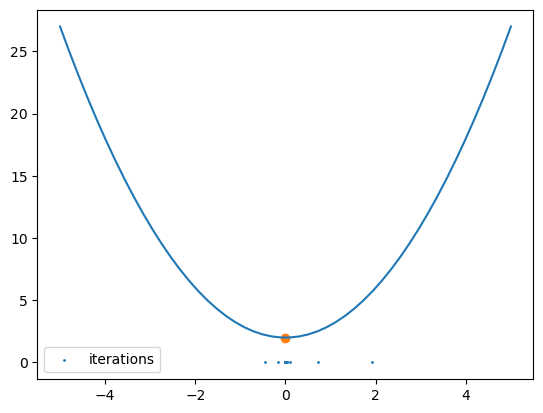

In [13]:
def f1(x):
    return x**2 + 2

x = np.linspace(-5,5)
y = f1(x)
sols = []
x_min = golden_bornee(f1,-5,5,0.01, sols)

print(f"{x_min=} ,Nb itérations : {len(sols)}")
plt.scatter(sols,[0]*len(sols) ,s=1,label="iterations")
plt.scatter(x_min, f1(x_min))
plt.plot(x,y)

plt.legend()
plt.show()

Nb itérations : 17


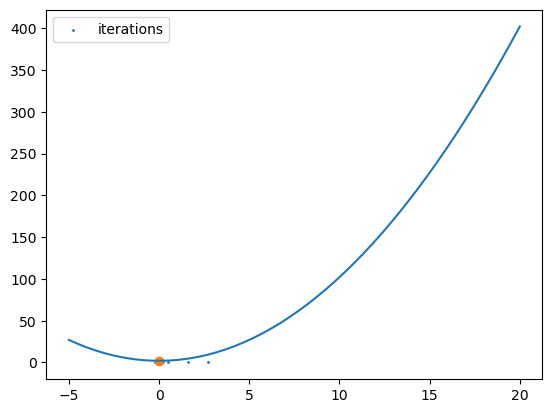

In [14]:
x = np.linspace(-5,20)
y = f1(x)
sols = []
x_min = golden_bornee(f1,-5,20,0.01, sols)
print(f"Nb itérations : {len(sols)}")
plt.scatter(sols,[0]*len(sols) ,s=1,label="iterations")
plt.scatter(x_min, f1(x_min))
plt.plot(x,y)

plt.legend()
plt.show()

In [14]:
def f2(x):
    return x**6 +3*np.exp(-x**2)+1/2*np.sin(5*x/2)

Nb itérations : 10


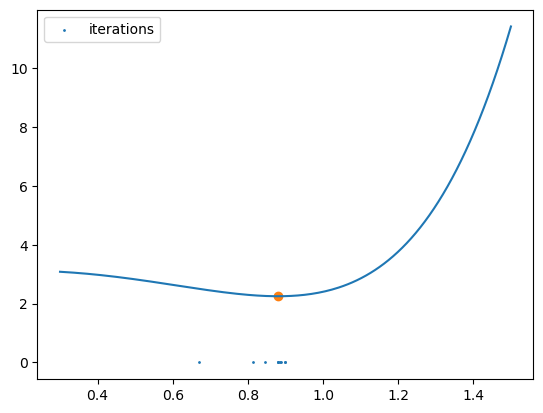

In [15]:
a,b = 0.3,1.5
x = np.linspace(a,b,200)
y = f2(x)
sols = []
x_min_my_scipy = golden_bornee(f2,a,b,0.01, sols)
print(f"Nb itérations : {len(sols)}")
plt.scatter(sols,[0]*len(sols) ,s=1,label="iterations")
plt.scatter(x_min_my_scipy, f2(x_min_my_scipy))
plt.plot(x,y)

plt.legend()
plt.show()

### Comparaison avec scipy.optimize.golden

In [16]:
from scipy.optimize import golden as scipy_golden


f1_min_my_golden = golden_bornee(f1,-5,5,0.01, sols)
f1_min_scipy_golden = scipy_golden(f1,brack=(-5,5), tol=0.01,maxiter=64)


f2_min_my_golden = golden_bornee(f2,0.3,1.5,0.01, sols)
f2_min_scipy_golden = scipy_golden(f2,brack=(0.3,0.8,1.5), tol=0.01,maxiter=64)

f1_min_my_golden-f1_min_scipy_golden, f2_min_my_golden-f2_min_scipy_golden

(1.4889986857226779e-08, -0.00033856482872884897)

Même chose sur l'intervalle $[-\frac{3}{2},\frac{3}{2}]$,
pour lequel la fonction $f2$ n'est plus unimodale. La méthode du nombre d'or ne garantie alors plus de trouver le minimum absolu de la fonction sur cet intervale. En revanche, il trouve un extremum local. 


Minimum -0.80 : 296 fois trouvé, soit 98.66666666666667%
Minimum  0.88 : 4 fois trouvé, soit 1.3333333333333335%


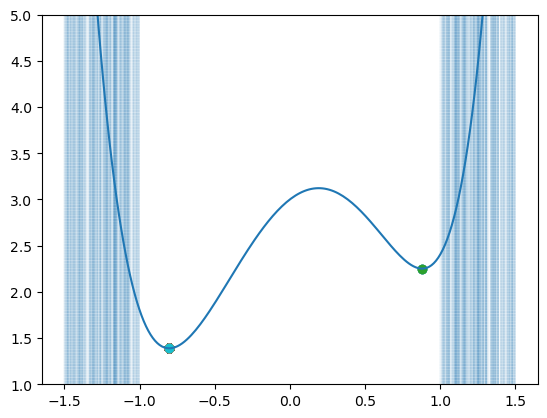

In [17]:
from random import random
a,b = -1.5,1.5
x = np.linspace(a,b,200)
y = f2(x)

nb_min_1 = 0
nb_min_2 = 0
n = 300
for _ in range(n):
    # [-1.5, -1]
    a = 1/2*random() - 1.5
    # [1, 1.5]
    b = 1/2*random() + 1
    plt.vlines(a,0,10,linestyles="--",linewidth=0.1)
    plt.vlines(b,0,10,linestyles="--",linewidth=0.1)
    x_min = golden_bornee(f2,a,b,10e-10, sols)
    if np.isclose(x_min, -0.8027774095281383):
        nb_min_1 +=1
    elif np.isclose(x_min, 0.880188978966858):
        nb_min_2 +=1
    else:
        raise RuntimeError("Minimum trouvé inconnu")

    plt.scatter(x_min, f2(x_min))
plt.ylim(1,5)
plt.plot(x,y)

print(f"Minimum -0.80 : {nb_min_1} fois trouvé, soit {nb_min_1/n*100}%")
print(f"Minimum  0.88 : {nb_min_2} fois trouvé, soit {nb_min_2/n*100}%")

plt.show()




# Scipy minimize

A "scalar" function is a  $f:\text{anything}\to \mathbb{R}$

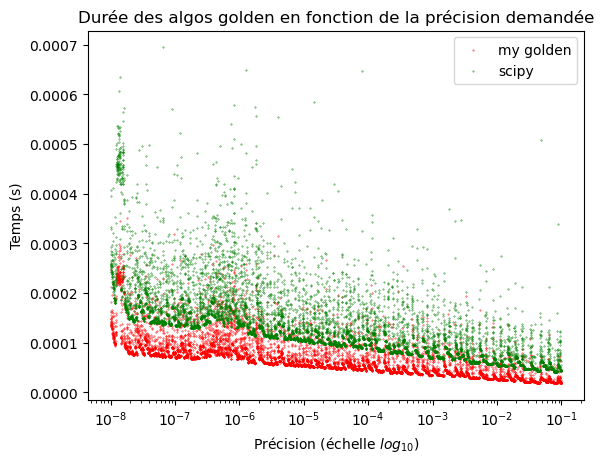

In [40]:
from scipy import optimize

a,b = 0.3,1.5
y = f2(x)
sols = []


precisions = np.logspace(-8, -1, num=10000, base=10)
y_my_golden = []
y_scipy_golden = []

for i, eps in enumerate(precisions):
    # print(f"{eps=}   {i}/{len(precisions)}")
    t0 = time.perf_counter()
    optimize.golden(f2,brack=(a,b),tol=eps)
    t1 = time.perf_counter()
    y_scipy_golden.append(t1 - t0)

    t0 = time.perf_counter()
    golden_bornee(f2, a, b, eps, maxiter=int(10e100))
    t1 = time.perf_counter()
    y_my_golden.append(t1 - t0)

plt.title("Durée des algos golden en fonction de la précision demandée")
plt.xlabel("Précision (échelle $log_{10}$)")
plt.ylabel("Temps (s)")
plt.scatter(precisions, y_my_golden, label="my golden", color="red",s=0.1)
plt.scatter(precisions, y_scipy_golden, label="scipy",color="green",s=0.1)
plt.xscale('log')
plt.legend()
plt.show()
